In [70]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [51]:
# reading data into data frame
df=pd.read_csv("data\Mexico-real-estate-clean.csv")
nRows, nCols=df.shape

# looking at the shape of the data
print(f"There are {nRows} rows and {nCols} columns.")

# Lookind at the datatype for each column.
print(df.info())

#looking at a sample of 10 random instances
df.sample(10, random_state=42)

There are 1730 rows and 6 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1730 non-null   object 
 1   state          1730 non-null   object 
 2   lat            1730 non-null   float64
 3   lon            1730 non-null   float64
 4   area_m2        1730 non-null   float64
 5   price_usd      1730 non-null   float64
dtypes: float64(4), object(2)
memory usage: 81.2+ KB
None


,property_type,state,lat,lon,area_m2,price_usd
599,apartment,Estado de México,19.536253,-99.240456,99.0,65789.473684
1201,house,Distrito Federal,19.343664,-99.212308,350.0,242357.820000
628,house,Tamaulipas,22.258686,-97.851753,163.0,105263.157895
1642,apartment,Yucatán,21.008295,-89.591019,142.0,91169.230000
1263,house,Veracruz de Ignacio de la Llave,25.484016,-100.966568,290.0,115910.260000
931,house,Puebla,18.462721,-97.414111,250.0,144736.842105
23,house,Veracruz de Ignacio de la Llave,25.624891,-103.397214,106.0,40041.720000
844,house,Querétaro,20.574558,-100.412968,160.0,194736.842105
964,house,Morelos,18.858107,-99.200287,105.0,72578.947368
764,house,Distrito Federal,19.523950,-99.152881,95.0,147631.578947


<font size="+1">There are 1730 rows and 6 columns, with 2 datatypes, float and object.

In [52]:
#taking a look at the unique values per feature
for col in df.describe(include="object"):
    print(f"{col} : {df[col].nunique()}")
    print(df[col].unique())
    print("---"*30)

property_type : 2
['house' 'apartment']
------------------------------------------------------------------------------------------
state : 30
['Estado de México' 'Nuevo León' 'Guerrero' 'Yucatán' 'Querétaro'
 'Morelos' 'Chiapas' 'Tabasco' 'Distrito Federal' 'Nayarit' 'Puebla'
 'Veracruz de Ignacio de la Llave' 'Sinaloa' 'Tamaulipas' 'Jalisco'
 'San Luis Potosí' 'Baja California' 'Hidalgo' 'Quintana Roo' 'Sonora'
 'Chihuahua' 'Baja California Sur' 'Zacatecas' 'Aguascalientes'
 'Guanajuato' 'Durango' 'Tlaxcala' 'Colima' 'Oaxaca' 'Campeche']
------------------------------------------------------------------------------------------


<font size="+1">The 'property_type' has only 2 unique values and the 'state' column has 30 unique values.

In [53]:
#checking for basic stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,1730.0,20.769135,2.747206,15.752900,19.273231,19.625756,21.075122,32.665619
lon,1730.0,-98.802722,4.886029,-117.054763,-100.393310,-99.204589,-98.245911,-86.767539
area_m2,1730.0,170.503468,80.589623,60.000000,102.000000,156.500000,220.000000,385.000000
price_usd,1730.0,115316.033929,65492.896545,33157.894737,65672.613421,99262.132105,150802.912500,326733.660000


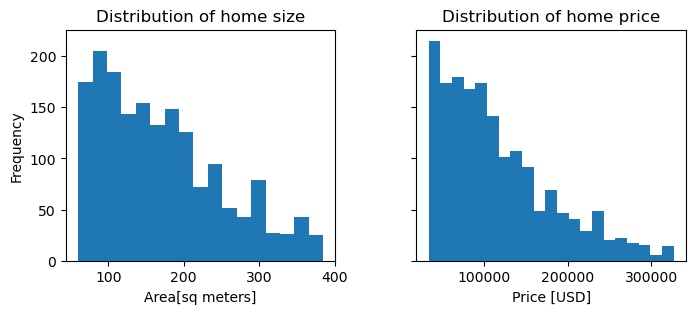

In [54]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(1,2 ,sharey=True,  figsize=(8, 3))
df.drop(columns=["lon", "lat"]).hist(bins='auto',grid=False, ax=ax)

#labelling the axis
ax[0].set_xlabel("Area[sq meters]")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of home size")

ax[1].set_xlabel("Price [USD]")
ax[1].set_title("Distribution of home price");

<font size="+1"><strong>Insight:
    
<font size="+1">   * The minimun price for houses is 60.000000 USD while the maximum price is 385.000000 USD. From looking at the median and the mean, it is clear that the price column data is slightly right skewed meaning most of the house prices are clustered around 100 000USD to250 000USD a few are around 300000.
    
<font size="+1">    * Same goes for the home sizes, most of the house size are  less than 300 meter square.

<font size="+1"><strong>1. Is there a relationship between house price and size?

Text(0.5, 1.0, 'Price Vs Area')

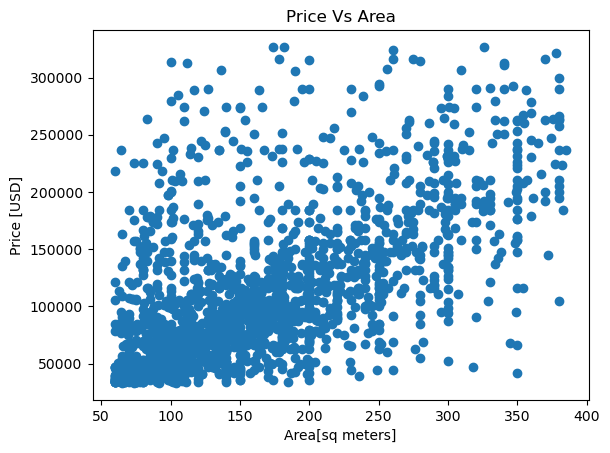

In [71]:
plt.scatter(x=df['area_m2'], y=df['price_usd'])
plt.xlabel('Area[sq meters]')
plt.ylabel('Price [USD]')
plt.title('Price Vs Area')

In [55]:
corr=df.area_m2.corr(df["price_usd"])
corr

0.5871863631271027

<font size="+1">There is a positive relationship between the house price and the size of the house,though it isn't strong. This means the size of the house has some impact on the house price.

In [80]:
df["state"].unique()

array(['Estado de México', 'Nuevo León', 'Guerrero', 'Yucatán',
       'Querétaro', 'Morelos', 'Chiapas', 'Tabasco', 'Distrito Federal',
       'Nayarit', 'Puebla', 'Veracruz de Ignacio de la Llave', 'Sinaloa',
       'Tamaulipas', 'Jalisco', 'San Luis Potosí', 'Baja California',
       'Hidalgo', 'Quintana Roo', 'Sonora', 'Chihuahua',
       'Baja California Sur', 'Zacatecas', 'Aguascalientes', 'Guanajuato',
       'Durango', 'Tlaxcala', 'Colima', 'Oaxaca', 'Campeche'],
      dtype=object)

In [103]:
df.select_dtypes("number").corr()

,lat,lon,area_m2,price_usd,price_per_m2
lat,1.000000,-0.481125,0.080922,-0.085711,-0.170045
lon,-0.481125,1.000000,0.095279,0.033199,-0.030945
area_m2,0.080922,0.095279,1.000000,0.587186,-0.272689
price_usd,-0.085711,0.033199,0.587186,1.000000,0.543344
price_per_m2,-0.170045,-0.030945,-0.272689,0.543344,1.000000


**Look at an indidual state**

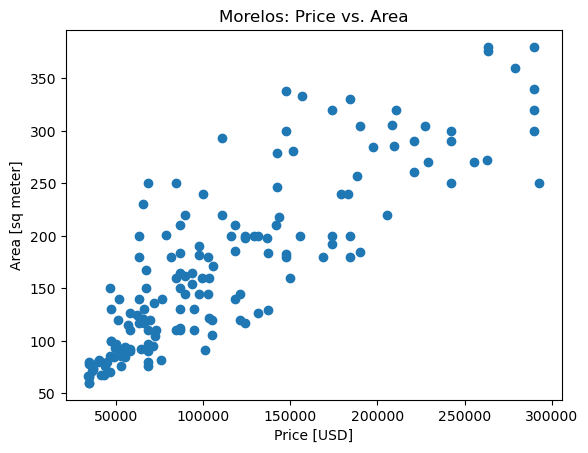

In [112]:
# subsetting to 'Morelos'
df_morelos=df[df["state"]=='Morelos']
plt.scatter(df_morelos["price_usd"], df_morelos['area_m2'])
plt.xlabel("Price [USD]")
plt.ylabel("Area [sq meter]")
plt.title("Morelos: Price vs. Area");

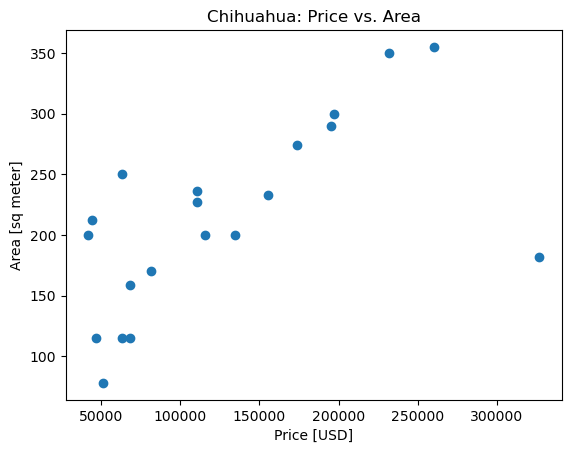

In [117]:
# subsetting to Chihuahua
df_Chihuahua=df[df["state"]=='Chihuahua']
plt.scatter(df_Chihuahua["price_usd"], df_Chihuahua['area_m2'])
plt.xlabel("Price [USD]")
plt.ylabel("Area [sq meter]")
plt.title("Chihuahua: Price vs. Area");

<font size="+1">Even though it seems like there isn't enough data to make conclusion  for other state but if the data was representative then it's clear some home prices are indeed depended on the area of the home but it does appear that there are other factors influencing the house price. 

<font size="+1"><strong>2.Which state has the most expensive real estate market?

In [62]:
df["price_per_m2"]=df["price_usd"]/df["area_m2"]

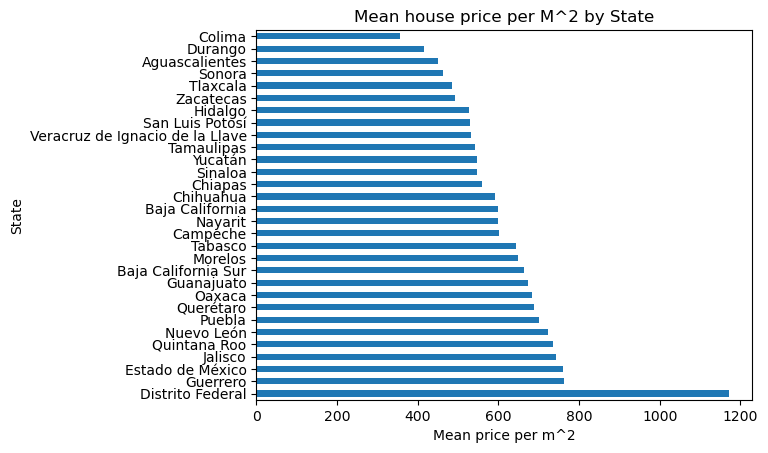

In [69]:
df.groupby("state")["price_per_m2"].mean().sort_values(ascending=False).plot(kind="barh", ylabel='State', xlabel='Mean price per m^2', title='Mean house price per M^2 by State');

<font size="+1"> Distrito Federal is the most expensive state when looking at the price per square meter and Colima is the least expensive state.